# Analysis of the DataSet 'Bike Buyers 1000'

ESP: "Compradores de Bicicletas"

## Objective:

Perform data preprocessing and cleaning on the selected dataset using the techniques covered in the class.



## Dataset:

This dataset has details of 1000 users from different backgrounds and whether or not they buy a bike. This data can be used for prediction models using Machine Learning Algorithms.

Short overview:

- ID
- Marital Status: [Married, Single]
- Gender: [Male, Female]
- Income: [40000, 30000, 80000, ...]
- Children: [0, 1, 2 ...]
- Education: ['Bachelors', 'Partial College', ...]
- Occupation: ['Skilled Manual', 'Clerical',...]
- Home Owner: [yes, no]
- Cars: [0, 1, 2 ...]
- Commute Distance: ['0-1 Miles', '2-5 Miles', '5-10 Miles', ...]
- Region: ['Europe', 'Pacific', 'North America']
- Age: [42, 43, 60, 41 ... ]
- (Target) Purchased Bike: [yes, no](target)

link: https://www.kaggle.com/datasets/heeraldedhia/bike-buyers

## Libraries:
Libraries used throughout the project

In [1]:
# data analysis
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import LocalOutlierFactor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# feature selection
from sklearn.feature_selection import RFE

# models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from numpy import mean
from numpy import std
from numpy import arange

### 1. Initialisation
#### 1.1. Recognizing the Structure of the Dataset

Loading the data and viewing its initial entries

In [2]:
df = pd.read_csv('./TRABAJO/datasets/bykes/bike_buyers.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


The dataset's size

In [3]:
df.shape

(1000, 13)

Loading descriptive information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


- The dataset has 1000 entries and 13 columns 
- Columns with missing values: Marital Status, Gender, Income, Children, Home Owner, Cars, Age

- Numerical Columns: ID, Income, Children, Cars, Age
- Categorical Columns: Marital Status, Gender, Education, Occupation, Home Owner, Commute Distance, Region, Purchased Bike

Statistical description of the numerical columns in the dataset


In [5]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


Observing the larger standard deviation and range (min-max) values in the "Income" and "Age" columns compared to other columns, it is evident that these features have different scales. Consequently, it is advisable to consider scaling the dataset. 

Data distribution of the target column

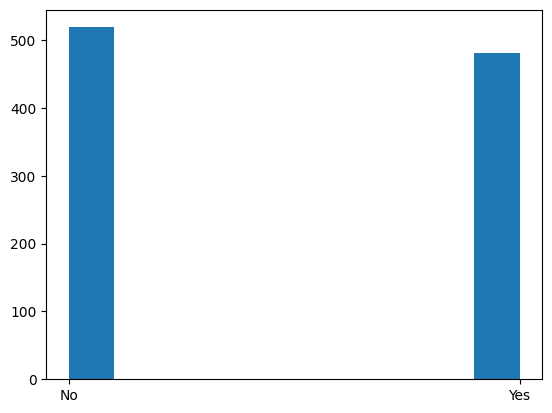

In [6]:
df['Purchased Bike'].value_counts()
plt.hist(df['Purchased Bike'])
plt.show()

The present graph illustrates a balanced distribution of 'yes' and 'no' values in the label data, suggesting a balanced target class

#### 1.2. Outlining Potential Next Steps:
1. Eliminate the following columns:

   - ID since it lacks significance, and duplicates cannot be identified.
   - Education; assuming it doesn't significantly impact the analysis (consider inclusion at a later stage).
   

2. Verify for duplicate entries.
3. Examine the presence of null values.
4. Preprocess the data for an initial assessment by implementing fundamental cleaning steps. This allows us to obtain preliminary evaluation scores for later comparison.
5. Implement and evaluate the outcomes of alternative techniques:

    - Apply VarianceThreshold.
    - Employ LOF (Local Outlier Factor) to identify outliers.
    - Encode categorical variables.
    - Scale the data.
6. Model Improvements

<!-- ### Numerical data
- Handling Missing Values 
    * Simple Imputer/Column Transformer
    * Numerical
- Checking for columns with low variance (not many unique values)
- Evaluate only on numerical

### Categorical data
- Handling Missing Values for Categoricals
- Encoder
- Evaluate on all dataset

    * VarianceThreshold + Pipeline Data Evaluation
- Scaling data
    * StandardScaler/ MinMax Scaler + pipeline data evaluation 
- Applying Encoding + Pipeline data evaluation
    * OneHoteEncoder / OrdinalEncoder +  Pipeline data evaluation -->

### 2. Data prepararion
#### 2.1. Eliminate the columns that lack significance
* ID
* Education

In [7]:
to_delete = ['ID', 'Education']
df.drop(to_delete, inplace=True, axis=1)

#### 2.2. Verify for duplicate entries


In [8]:
# Calculamos si existen duplicados
dups = df.duplicated()
# Se muestran si hay  duplicados
print(dups.any())
# Lista de las filas primeras filas duplicadas
print(df[dups].head())
#Numero de instancias duplicadas
df.duplicated().sum()

True
    Marital Status  Gender   Income  Children    Occupation Home Owner  Cars  \
105         Single  Female  30000.0       0.0      Clerical         No   1.0   
125        Married    Male  80000.0       5.0  Professional        Yes   4.0   
212         Single  Female  30000.0       0.0      Clerical         No   1.0   
219         Single    Male  10000.0       0.0        Manual        Yes   1.0   
231        Married  Female  40000.0       0.0      Clerical        Yes   0.0   

    Commute Distance   Region   Age Purchased Bike  
105        2-5 Miles   Europe  30.0             No  
125        1-2 Miles  Pacific  40.0             No  
212        2-5 Miles   Europe  30.0             No  
219        1-2 Miles  Pacific  26.0            Yes  
231        0-1 Miles   Europe  38.0            Yes  


52

#### 2.2.1. Eliminating duplicates


In [9]:
df.drop_duplicates(inplace=True)

#### 2.3. Examine the presence of null values


In [10]:
# columns with missing values
df.isnull().sum()[df.isnull().sum()>0]
print(f'we have {df.isnull().sum()[df.isnull().sum()>0].count()} columns with null values overall having {df.isnull().sum()[df.isnull().sum()>0].sum()} missing values')


we have 7 columns with null values overall having 53 missing values


#### 2.3.1. Eliminating rows with null values


In [11]:
null_rows_ind = df[df.isnull().any(axis=1)].index
df.drop(null_rows_ind, inplace=True)
df.reset_index(drop=True, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marital Status    900 non-null    object 
 1   Gender            900 non-null    object 
 2   Income            900 non-null    float64
 3   Children          900 non-null    float64
 4   Occupation        900 non-null    object 
 5   Home Owner        900 non-null    object 
 6   Cars              900 non-null    float64
 7   Commute Distance  900 non-null    object 
 8   Region            900 non-null    object 
 9   Age               900 non-null    float64
 10  Purchased Bike    900 non-null    object 
dtypes: float64(4), object(7)
memory usage: 77.5+ KB


The dataset size has been decreased by 10%.

Ensuring that the label remains balanced after decreasing the data set

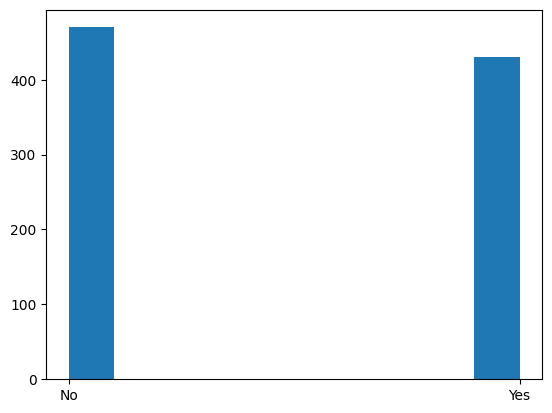

In [13]:
plt.hist(df['Purchased Bike'])
plt.show()

Specifying the types of columns

In [14]:
# getting all the columns
sorted_cols = df.columns

# getting all the numeric columns
numeric_cols = df.select_dtypes(include=['float64']).columns

# getting all the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

feature_cols = df.columns[:-1]

# getting the label column
label_col = ['Purchased Bike']

categorical_cols = categorical_cols.drop(label_col)

Encoding the label column

In [15]:
label_encoder = LabelEncoder()  
df['Purchased Bike'] = label_encoder.fit_transform(df[label_col])

c:\Users\elinf\anaconda3\envs\uni\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3. Initial Evaluation - Assessing the Data Post Basic Preprocessing for Preliminary Scoring

3.1. Establishment of the Evaluation Function

In [16]:
def evaluate(model, X, y, metrics='accuracy'):
    score = cross_val_score(model, 
                            X, y,
                            scoring=metrics, cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1),
                            n_jobs=-1)
    score_mean = mean(score)
    score_std = std(score)
    print('Accuracy: %.3f (%.3f)' % (score_mean, score_std))

Results of the Evaluation Using the RandomForestClassifier Model

In [17]:
model = RandomForestClassifier(random_state=1)
evaluate(model, df[numeric_cols], df[label_col])

Accuracy: 0.644 (0.048)


After the initial approximation on numerical values, we've reached an accuracy of 64%. The following steps were implemented:

1. Dropping columns with no significant impact (ID, Education).
2. Eliminating duplicate entries.
3. Handling null values.
4. Utilizing label encoding.

Moving forward, our focus is on further enhancing the dataset by applying the data preprocessing steps outlined at the beginning.




### 4. Implement and evaluate the outcomes of alternative techniques:
    - Apply VarianceThreshold.
    - Employ LOF (Local Outlier Factor) to identify outliers.
    - Encode categorical variables.
    - Scale the data.

#### 4.1. Low Variance using VarianceThreshold

In [18]:
X = df[numeric_cols]
y = df[label_col]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = []
for threshold in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=threshold)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print(f'>Threshold = {threshold:.2} \t Features = {n_features}')
    # store the result
    results.append(n_features)


(900, 4) (900, 1)
>Threshold = 0.0 	 Features = 4
>Threshold = 0.05 	 Features = 4
>Threshold = 0.1 	 Features = 4
>Threshold = 0.15 	 Features = 4
>Threshold = 0.2 	 Features = 4
>Threshold = 0.25 	 Features = 4
>Threshold = 0.3 	 Features = 4
>Threshold = 0.35 	 Features = 4
>Threshold = 0.4 	 Features = 4
>Threshold = 0.45 	 Features = 4
>Threshold = 0.5 	 Features = 4


The analysis results show that there are no columns in the numerical data with a variance of less than 0.50. This means that each column has sufficient quantity of unique values to proceed with the further analysis.

#### 4.2. Applying LOF (Local Outlier Factor) to identify outliers

Showing pairplot to detect possible outliers.

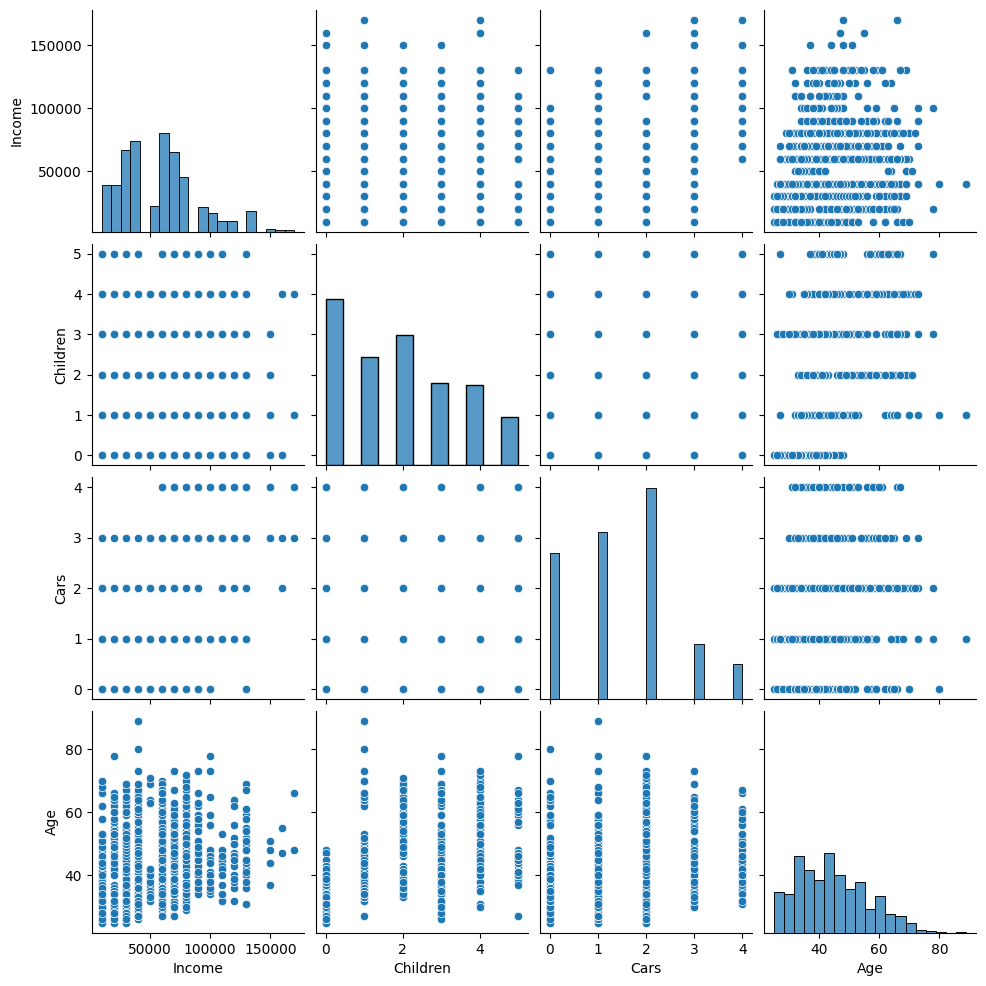

In [19]:
sns.pairplot(df[numeric_cols])

It is reasonable to assume that potential outliers may arise from high values in the 'Income' column and values exceeding 80 in the 'Age' column. Subsequently, let's generate individual boxplots for the specified 'Age' and 'Income' columns, highlighting possible outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x106ad570e50>,
 'caps': [<matplotlib.lines.Line2D at 0x106ad41e8c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x106ad570bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x106ad4909d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x106ad4906a0>],
 'means': []}

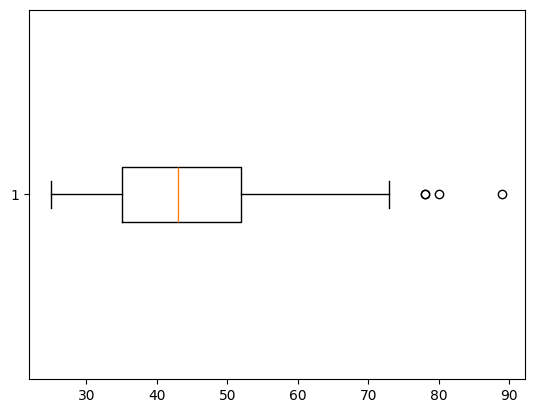

In [20]:
plt.boxplot(df['Age'], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x106adab7730>,
 'caps': [<matplotlib.lines.Line2D at 0x106adab7c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x106adab7490>],
 'medians': [<matplotlib.lines.Line2D at 0x106adae81f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x106adae8490>],
 'means': []}

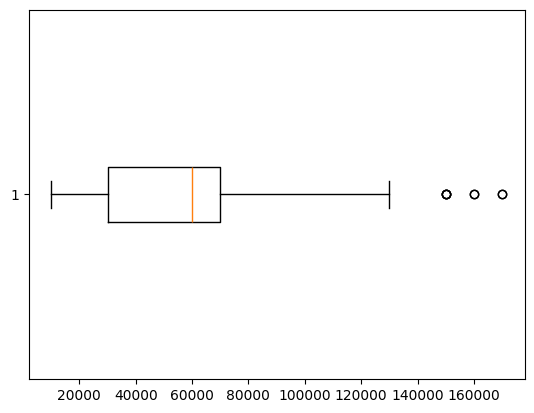

In [21]:
plt.boxplot(df['Income'], vert=False)

In [22]:
print('Before:', df.shape)
lof = LocalOutlierFactor()
outliers = lof.fit_predict(df[numeric_cols])
mask = outliers != -1
df = df[mask]
print('After:', df.shape)

Before: (900, 11)
After: (829, 11)


In [23]:
df.describe()

,Income,Children,Cars,Age,Purchased Bike
count,829.000000,829.000000,829.000000,829.000000,829.000000
mean,53196.622437,1.870929,1.357057,43.539204,0.481303
std,27754.726075,1.617085,1.059983,10.703287,0.499952
min,10000.000000,0.000000,0.000000,25.000000,0.000000
25%,30000.000000,0.000000,0.000000,35.000000,0.000000
50%,60000.000000,2.000000,1.000000,43.000000,0.000000
75%,70000.000000,3.000000,2.000000,51.000000,1.000000
max,130000.000000,5.000000,4.000000,73.000000,1.000000


The dataset's size has been reduced through the elimination of outliers. Additionally, it is noteworthy that the maximum value in the 'Age' column is no longer 89, as it was excluded as an outlier. Furthermore, the maximum value in the 'Income' column has become from 170.000 to 130.000.

In [24]:
model = RandomForestClassifier(random_state=1)
evaluate(model, df[numeric_cols], df[label_col])

Accuracy: 0.646 (0.053)


Given that the removal of outliers resulted in an improved accuracy from 64.4% to 64.6%, we may choose to retain the dataset without outliers for the time being and later compare the results with outliers.

#### 4.3. Encode categorical variables

In [25]:
df[categorical_cols]

,Marital Status,Gender,Occupation,Home Owner,Commute Distance,Region
0,Married,Female,Skilled Manual,Yes,0-1 Miles,Europe
1,Married,Male,Clerical,Yes,0-1 Miles,Europe
2,Married,Male,Professional,No,2-5 Miles,Europe
3,Single,Male,Clerical,No,0-1 Miles,Europe
4,Married,Female,Manual,Yes,1-2 Miles,Europe
...,...,...,...,...,...,...
895,Married,Male,Professional,Yes,1-2 Miles,North America
896,Married,Male,Professional,Yes,2-5 Miles,North America
897,Single,Male,Professional,Yes,2-5 Miles,North America
898,Single,Male,Management,No,1-2 Miles,North America


Categorical columns will be applied OneHotEncoder and OrdinalEncoder:

**Ordinal Encoder:**

- Commute Distance: 

    It is suitable for applying an ordinal encoder as it allows us to estimate the distance between values.

Applying OrdinalEncoder to the following columns due to having only 2 unique values:
- Marital Status
- Gender
- Home Owner

**OneHotEncoder:**

- Occupation
- Region

Creating pipeline and evaluating the model 

In [26]:
encoder = ColumnTransformer(
    [
        ('OneHotEnc', OneHotEncoder(drop='first'), ['Occupation', 'Region']),
        ('OrdinalEncoder', OrdinalEncoder(), ['Commute Distance', 'Marital Status', 'Gender', 'Home Owner'])
    ],
    remainder = "passthrough",
)

pipeline = Pipeline(
    [
        ('encoder', encoder),
        ('model', RandomForestClassifier(random_state=1))
    ]
    
)
evaluate(pipeline, df[feature_cols], df[label_col])

Accuracy: 0.684 (0.041)


Following the application of encoding techniques, the accuracy obtained a 3.8% improvement, increasing from 0.646 to 0.684.

#### 4.5. Scaling the data

In [27]:
encoder = ColumnTransformer(
    [
        ('OneHotEnc', OneHotEncoder(drop='first'), ['Occupation', 'Region']),
        ('OrdinalEncoder', OrdinalEncoder(), ['Commute Distance', 'Marital Status', 'Gender', 'Home Owner'])
    ],
    remainder = MinMaxScaler()
)

pipeline = Pipeline(
    [
        ('encoder', encoder),
        ('model', RandomForestClassifier(random_state=1))
    ]
    
)
evaluate(pipeline, df[feature_cols], df[label_col])

Accuracy: 0.684 (0.042)


The utilization of scaling techniques did not show any significant impact on the scoring results.

Comparing the scoring results by applying the StandardScaler

In [28]:
encoder = ColumnTransformer(
    [
        ('OneHotEnc', OneHotEncoder(drop='first'), ['Occupation', 'Region']),
        ('OrdinalEncoder', OrdinalEncoder(), ['Commute Distance', 'Marital Status', 'Gender', 'Home Owner'])
    ],
    remainder = StandardScaler()
)

pipeline = Pipeline(
    [
        ('encoder', encoder),
        ('model', RandomForestClassifier(random_state=1))
    ]
    
)
evaluate(pipeline, df[feature_cols], df[label_col])

Accuracy: 0.685 (0.043)


#### 4.6 Scaling categorical data
Given that we have encoded categorical data, it may be beneficial to consider scaling them as well.

In [29]:
ordinal_enc_scaler = Pipeline(
    [
        ('OrdinalEncoder', OrdinalEncoder()),
        ('MinMaxScaler', MinMaxScaler())
    ]
)
encoder = ColumnTransformer(
    [
        ('OneHotEnc', OneHotEncoder(drop='first'), ['Occupation', 'Region']),
        ('ordinal_enc_scaler', ordinal_enc_scaler, ['Commute Distance', 'Marital Status', 'Gender', 'Home Owner'])
    ],
    remainder = MinMaxScaler()
)

pipeline = Pipeline(
    [
        ('encoder', encoder),
        ('model', RandomForestClassifier(random_state=1))
    ]
    
)
evaluate(pipeline, df[feature_cols], df[label_col])

Accuracy: 0.684 (0.042)


#### 4.6 Feature Selection by applying Recursive Feature Elimination (RFE) 
Select the top 75% of features based on their importance

In [30]:
ordinal_enc_scaler = Pipeline(
    [
        ('OrdinalEncoder', OrdinalEncoder()),
        ('MinMaxScaler', MinMaxScaler())
    ]
)
encoder = ColumnTransformer(
    [
        ('OneHotEnc', OneHotEncoder(drop='first'), ['Occupation', 'Region']),
        ('ordinal_enc_scaler', ordinal_enc_scaler, ['Commute Distance', 'Marital Status', 'Gender', 'Home Owner'])
    ],
    remainder = MinMaxScaler()
)

pipeline = Pipeline(
    [
        ('encoder', encoder),
        ('RFE', RFE(estimator=RandomForestClassifier(random_state=1), n_features_to_select=0.75)),
        ('model', RandomForestClassifier(random_state=1))
    ]
    
)
evaluate(pipeline, df[feature_cols], df[label_col])

Accuracy: 0.690 (0.043)


Following the application of RFE, the accuracy obtained a slight improvement, increasing from 0.684 to 0.690. 


The observed low accuracy can be attributed to the initial reduction of the dataset by 10 -15%, which resulted in insufficient data for effective model training. To address this issue, I propose implementing Imputer techniques. The solution involves creating a pipeline that prioritizes the application of Imputer followed by the remaining techniques to improve overall model performance.

#### 5. Model Improvement

In [31]:
# data analysis
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import LocalOutlierFactor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# feature selection
from sklearn.feature_selection import RFE

# models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from numpy import mean
from numpy import std
from numpy import arange

In [32]:
df = pd.read_csv('./TRABAJO/datasets/bykes/bike_buyers.csv', na_values='?')
to_delete = ['ID', 'Education']
df.drop(to_delete, inplace=True, axis=1)
dups = df.duplicated()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
label_encoder = LabelEncoder()
df['Purchased Bike'] = label_encoder.fit_transform(df[label_col])

sorted_cols = df.columns
# getting all the numeric columns
numeric_cols = df.select_dtypes(include=['float64']).columns

# getting all the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# categorical_cols.delete(-1)
feature_cols = df.columns[:-1]

# getting the label column
label_col = ['Purchased Bike']

c:\Users\elinf\anaconda3\envs\uni\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 5.1. Imputer Strategy 

We can apply SimpleImputer with Strategy of the most frequent value on categorical columns and use KNNImputer on numerical

In [33]:

ordinal_enc_scaler = Pipeline(
    [   # categorical, ordinal
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('OrdinalEncoder', OrdinalEncoder()),
        ('MinMaxScaler', MinMaxScaler())
    ]
)


onehot_enc_imputer = Pipeline(
    [ # categorical, nominal
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('OneHotEnc', OneHotEncoder(drop='first', sparse=False))
    ]
)

# numerical
remainder = Pipeline(
    [
        ('imputer', KNNImputer()),
        ('MinMaxScaler', MinMaxScaler())
    ]
)


preprocessing = ColumnTransformer(
    [   
        ('OneHotEnc', onehot_enc_imputer, ['Occupation', 'Region']),
        ('ordinal_enc_scaler', ordinal_enc_scaler, ['Commute Distance', 'Marital Status', 'Gender', 'Home Owner'])
    ],
    remainder = remainder
)

pipeline = Pipeline(
    [
        ('preprocessing', preprocessing),
        ('RFE', RFE(estimator=RandomForestClassifier(random_state=1), n_features_to_select=0.75)),
        ('model', RandomForestClassifier(random_state=1))
    ]
    
)
evaluate(pipeline, df[feature_cols], df[label_col])

Accuracy: 0.691 (0.045)


In the beginning we mentioned the possibility of excluding the "Education" column initially and revisiting its inclusion later. Let's now try incorporating it into our analysis.

In [34]:
df = pd.read_csv('./TRABAJO/datasets/bykes/bike_buyers.csv', na_values='?')
to_delete = ['ID']
df.drop(to_delete, inplace=True, axis=1)
dups = df.duplicated()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
label_encoder = LabelEncoder()
df['Purchased Bike'] = label_encoder.fit_transform(df[label_col])

sorted_cols = df.columns
# getting all the numeric columns
numeric_cols = df.select_dtypes(include=['float64']).columns

# getting all the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# categorical_cols.delete(-1)
feature_cols = df.columns[:-1]

# getting the label column
label_col = ['Purchased Bike']

c:\Users\elinf\anaconda3\envs\uni\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
ordinal_enc_scaler = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('OrdinalEncoder', OrdinalEncoder()),
        ('MinMaxScaler', MinMaxScaler())
    ]
)

onehot_enc_imputer = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('OneHotEnc', OneHotEncoder(drop='first', sparse=False))
    ]
)

remainder = Pipeline(
    [
        ('imputer', KNNImputer()),
        ('MinMaxScaler', MinMaxScaler())
    ]
)


preprocessing = ColumnTransformer(
    [   
        ('OneHotEnc', onehot_enc_imputer, ['Occupation', 'Region', 'Education']),
        ('ordinal_enc_scaler', ordinal_enc_scaler, ['Commute Distance', 'Marital Status', 'Gender', 'Home Owner'])
    ],
    remainder = remainder
)

pipeline = Pipeline(
    [

        ('preprocessing', preprocessing),
        ('RFE', RFE(estimator=RandomForestClassifier(random_state=1), n_features_to_select=0.75)),
        ('model', RandomForestClassifier(random_state=1))
    ]
    
)
evaluate(pipeline, df[feature_cols], df[label_col])

Accuracy: 0.701 (0.048)


The accuracy was improved from the initial approximation 0.644 to 0.701 by 5.7%
Further considerations could involve exploring alternative approaches, including:

- Adjusting parameters of the KNN imputer
- Exploring different imputation strategies
- Evaluating alternative models
- Experimenting with diverse techniques for feature selection

Additionally, we can explore other techniques that align with the achieved results throughout the process.